# Without Preprocessing

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSE445/Dataset/Maternal-Health-Risk-Data-Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [ ]:
# Run commands for beautifying figures
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
X = df.drop(columns = 'RiskLevel')
y = df['RiskLevel']

In [ ]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

#smote = SMOTE(sampling_strategy='minority')
#X_sm, y_sm = smote.fit_sample(X, y)

#y_sm.value_counts()
y.value_counts()

high risk    406
low risk     406
mid risk     406
Name: RiskLevel, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(974, 6) (974,) (244, 6) (244,)


In [ ]:
X_train

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
432,40,140,100,13.000000,101.00000,66
277,60,120,85,15.000000,98.00000,60
721,28,85,60,9.000000,101.00000,86
1062,40,120,94,11.112471,98.00000,80
678,23,140,80,7.010000,98.00000,70
...,...,...,...,...,...,...
1044,39,120,75,7.795071,98.00000,70
1095,25,140,100,6.800000,98.00000,80
1130,60,120,85,15.000000,98.00000,60
860,17,90,63,6.900000,101.00000,70


In [ ]:
y_train

432     high risk
277     high risk
721      mid risk
1062    high risk
678     high risk
          ...    
1044    high risk
1095    high risk
1130    high risk
860      mid risk
1126    high risk
Name: RiskLevel, Length: 974, dtype: object

In [ ]:
X_train.columns.values

array(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate'],
      dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training set and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler transformation to the test set
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the scaled datasets
print(X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape)

(974, 6) (974,) (244, 6) (244,)


In [ ]:
from sklearn.metrics import accuracy_score
dt = DecisionTreeClassifier(criterion="gini")
dt.fit(X_train_scaled, y_train)
print('Accuracy ', accuracy_score(y_test, dt.predict(X_test_scaled)).round(3))

Accuracy  0.844


In [ ]:
y_pred = dt.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   high risk       0.99      0.90      0.94        73
    low risk       0.82      0.78      0.80        87
    mid risk       0.77      0.86      0.81        84

    accuracy                           0.84       244
   macro avg       0.86      0.85      0.85       244
weighted avg       0.85      0.84      0.85       244



##logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf_after =LogisticRegression(random_state=42,max_iter = 1000)
clf_after.fit(X_train_scaled, y_train)
print('Accuracy ', accuracy_score(y_test, clf_after.predict(X_test_scaled)).round(3))

Accuracy  0.643


In [ ]:
y_pred = clf_after.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   high risk       0.79      0.74      0.77        73
    low risk       0.65      0.69      0.67        87
    mid risk       0.51      0.51      0.51        84

    accuracy                           0.64       244
   macro avg       0.65      0.65      0.65       244
weighted avg       0.65      0.64      0.64       244



##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf_after =RandomForestClassifier(random_state=0)
clf_after.fit(X_train_scaled, y_train)
print('Accuracy ', accuracy_score(y_test, clf_after.predict(X_test_scaled)).round(3))

Accuracy  0.844


In [ ]:
y_pred = clf_after.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   high risk       1.00      0.92      0.96        73
    low risk       0.85      0.76      0.80        87
    mid risk       0.74      0.87      0.80        84

    accuracy                           0.84       244
   macro avg       0.86      0.85      0.85       244
weighted avg       0.85      0.84      0.85       244



##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf_after =KNeighborsClassifier(n_neighbors = 3)
clf_after.fit(X_train_scaled, y_train)
print('Accuracy ', accuracy_score(y_test, clf_after.predict(X_test_scaled)).round(3))

Accuracy  0.762


In [ ]:
y_pred = clf_after.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   high risk       0.92      0.82      0.87        73
    low risk       0.75      0.69      0.72        87
    mid risk       0.67      0.79      0.72        84

    accuracy                           0.76       244
   macro avg       0.78      0.77      0.77       244
weighted avg       0.77      0.76      0.76       244



##SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf_after =SVC(random_state=0)
clf_after.fit(X_train_scaled, y_train)
print('Accuracy ', accuracy_score(y_test, clf_after.predict(X_test_scaled)).round(3))

Accuracy  0.725


In [ ]:
y_pred = clf_after.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   high risk       0.94      0.85      0.89        73
    low risk       0.62      0.85      0.72        87
    mid risk       0.69      0.49      0.57        84

    accuracy                           0.73       244
   macro avg       0.75      0.73      0.73       244
weighted avg       0.74      0.73      0.72       244



##Confusion Matrix

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

<Axes: >

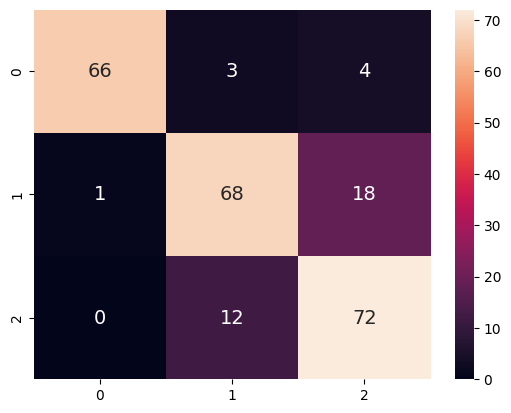

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)